### [Riddler Classic](https://fivethirtyeight.com/features/which-baseball-team-will-win-the-riddler-fall-classic/)

Riddler League Baseball, also known as the RLB, consists of three teams: the Mississippi Moonwalkers, the Delaware Doubloons and the Tennessee Taters.

Each time a batter for the Moonwalkers comes to the plate, they have a 40 percent chance of getting a walk and a 60 percent chance of striking out. Each batter for the Doubloons, meanwhile, hits a double 20 percent percent of the time, driving in any teammates who are on base, and strikes out the remaining 80 percent of the time. Finally, each batter for the Taters has a 10 percent chance of hitting a home run and a 90 percent chance of striking out.

During the RLB season, each team plays an equal number of games against each opponent. Games are nine innings long and can go into extra innings just like in other baseball leagues. Which of the three teams is most likely to have the best record at the end of the season?



In [280]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [202]:
class SimGame(object):
    
    def __init__(self, home, away): 
        self.inning = 1
        self.home = home
        self.away = away
        self.home_runs = 0
        self.away_runs = 0
        self.result = {'home':home, 'away':away}
            
    def sim_half(self, batters):
        self.first = False
        self.second = False
        self.third = False
        runs = 0 
        outs = 0 
   
        while outs < 3:
            if batters == 'Moonwalkers':
                at_bat = np.random.choice(['out', 'walk'], p = [.6, .4])
            elif batters == 'Doubloons':
                at_bat = np.random.choice(['out', 'double'], p = [.8, .2])
            else:
                at_bat = at_bat = np.random.choice(['out', 'tater'], p = [.9, .1])
                
            if at_bat == 'walk':
                if not self.first:
                    self.first = True
                        
                elif not self.second:
                    self.second = True
                        
                elif not self.third:
                    self.third = True
                        
                else:
                    runs += 1
                    
            elif at_bat == 'double':
                if not self.second:
                    self.second = True
                    
                else:
                    runs += 1
                    
            elif at_bat == 'tater':
                runs += 1
                
            else:
                outs += 1 
                    
        return runs
    
    def sim_game(self):
        
        while self.inning <= 9:
            
            ### away team bats
            self.away_runs += self.sim_half(self.away)
            self.inning +=.5
            
            ### home team doesn't need to bat if they are leading in the middle of the eigth 
            if (self.inning ==9.5) and (self.home_runs > self.away_runs):
                self.result['home_runs'] = self.home_runs
                self.result['away_runs'] = self.away_runs
                self.result['winner'] = self.home
                self.result['innings'] = self.inning - 1
                
                return self.result
            
            ### home team bats
            self.home_runs += self.sim_half(self.home)
            
            self.inning +=.5
        
        ### if true away team wins the game 
        if self.away_runs > self.home_runs:
            self.result['home_runs'] = self.home_runs
            self.result['away_runs'] = self.away_runs
            self.result['winner'] = self.away
            self.result['innings'] = self.inning - 1
            return self.result
            
        game_tied = True
        
        while game_tied:
            ## away bats
            self.away_runs += self.sim_half(self.away)
            self.inning +=.5
            ## home bats 
            self.home_runs += self.sim_half(self.home) 
            
            self.inning += .5
            
            if self.away_runs > self.home_runs:
                self.result['home_runs'] = self.home_runs
                self.result['away_runs'] = self.away_runs
                self.result['winner'] = self.away
                self.result['innings'] = self.inning - 1
                return self.result 
                
            elif self.home_runs > self.away_runs:
                self.result['home_runs'] = self.home_runs
                self.result['away_runs'] = self.away_runs
                self.result['winner'] = self.home
                self.result['innings'] = self.inning - 1
                return self.result 
                
            else:
                continue 
                              

In [254]:
results = []

## simulating 10,000 games for each matchup (considering home and away teams)
for _ in range(10000):
    m_vs_t = SimGame(home='Moonwalkers', away='Taters')
    results.append(m_vs_t.sim_game())
    
    m_vs_d = SimGame(home='Moonwalkers', away='Doubloons')
    results.append(m_vs_d.sim_game())
    
    t_vs_m = SimGame(home='Taters', away='Moonwalkers')
    results.append(t_vs_m.sim_game())
    
    t_vs_d = SimGame(home='Taters', away='Doubloons')
    results.append(t_vs_d.sim_game())
    
    d_vs_t = SimGame(home='Doubloons', away='Taters')
    results.append(d_vs_t.sim_game())
    
    d_vs_m = SimGame(home='Doubloons', away='Moonwalkers')
    results.append(d_vs_m.sim_game())
    

In [255]:
results_df = pd.DataFrame(results)

In [293]:
results_df.head(3)

,away,away_runs,home,home_runs,innings,winner
0,Taters,2,Moonwalkers,1,9.0,Taters
1,Doubloons,1,Moonwalkers,0,9.0,Doubloons
2,Moonwalkers,3,Taters,5,12.0,Taters


In [256]:
results_df['winner'].value_counts(normalize=True)

Taters         0.380917
Moonwalkers    0.357067
Doubloons      0.262017
Name: winner, dtype: float64

# And the Taters are the best club - winning 38% of all games 

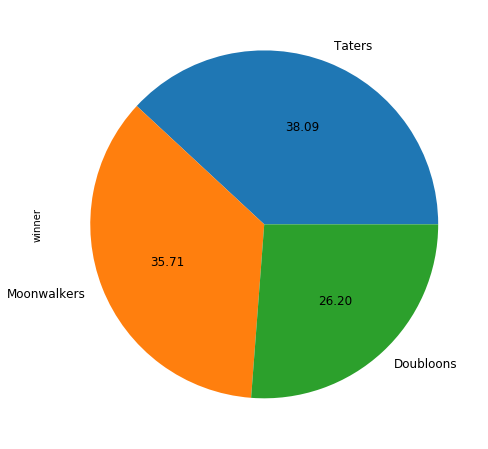

In [326]:
fig, ax = plt.subplots(figsize=(10,8))
results_df['winner'].value_counts(normalize=True).plot.pie(autopct='%.2f', ax=ax, fontsize=12);

In [274]:
def get_runs(team, df):
    home_runs = df.loc[df['home'].str.contains(team), 'home_runs']
    away_runs = df.loc[df['away'].str.contains(team), 'away_runs']
    
    return list(home_runs) + list(away_runs)
    

In [277]:
tater_runs = get_runs('Taters', results_df)
doub_runs = get_runs('Doubloons', results_df)
mw_runs = get_runs('Moonwalkers', results_df)

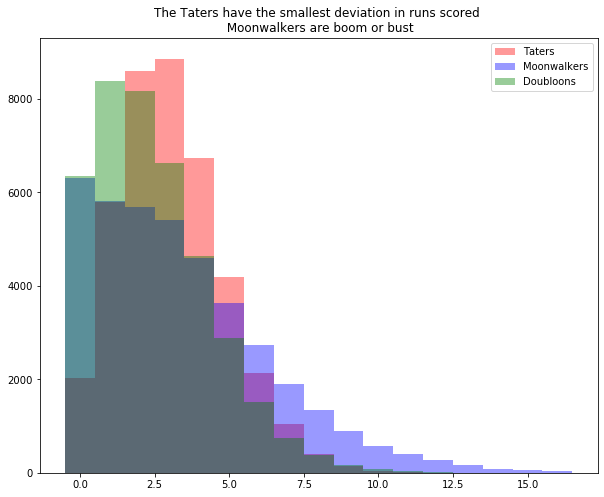

In [329]:
fig, ax = plt.subplots(figsize=(10,8))


sns.distplot(tater_runs, ax=ax, bins=np.arange(-.5,17.5,1), kde=False, label='Taters', color='Red')
sns.distplot(mw_runs, ax=ax, bins=np.arange(-.5,17.5,1), kde=False, label='Moonwalkers', color='Blue')
sns.distplot(doub_runs, ax=ax, bins=np.arange(-.5,17.5,1), kde=False, label='Doubloons', color='Green')
ax.legend()
ax.set_title('The Taters have the smallest deviation in runs scored \n Moonwalkers are boom or bust');

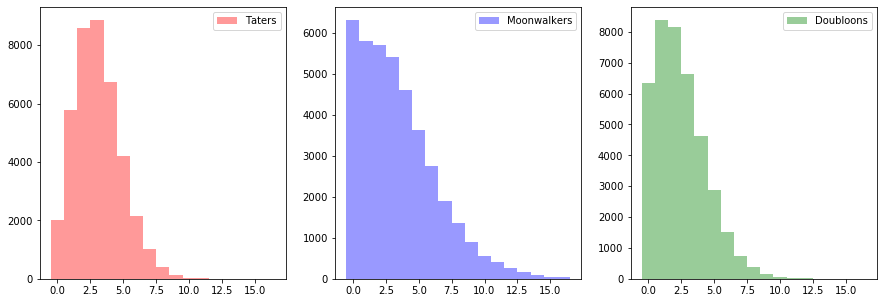

In [300]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))


sns.distplot(tater_runs, ax=ax1, bins=np.arange(-.5,17.5,1), kde=False, label='Taters', color='Red')
ax1.legend()
sns.distplot(mw_runs, ax=ax2, bins=np.arange(-.5,17.5,1), kde=False, label='Moonwalkers', color='Blue')
ax2.legend()
sns.distplot(doub_runs, ax=ax3, bins=np.arange(-.5,17.5,1), kde=False, label='Doubloons', color='Green')
ax3.legend();

## What about individual matchups? 

### The Doubloons are pretty terible 

In [307]:
def get_matchup(team_not_playing):
    return results_df[~results_df.\
                      apply(lambda row:(team_not_playing in row['home']) \
                            or (team_not_playing in row['away']), axis=1)]

In [309]:
doub_moon = get_matchup(team_not_playing='Taters')
doub_tate = get_matchup(team_not_playing='Moonwalkers')
moon_tate = get_matchup(team_not_playing='Doubloons')

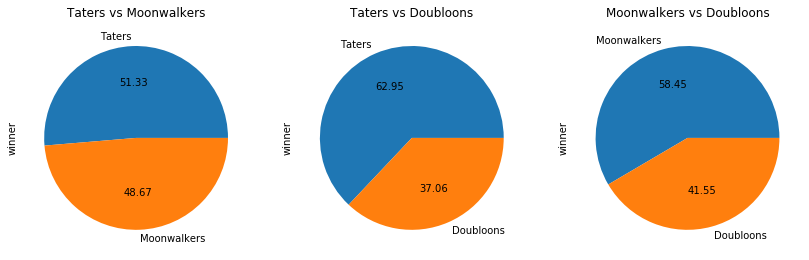

In [328]:
fig , (ax1, ax2, ax3) = plt.subplots(ncols = 3 , figsize=(14,6))

moon_tate['winner'].value_counts(normalize=True).plot.pie(autopct='%.2f', ax=ax1)
ax1.set_title('Taters vs Moonwalkers')

doub_tate['winner'].value_counts(normalize=True).plot.pie(autopct='%.2f', ax=ax2)
ax2.set_title('Taters vs Doubloons')

doub_moon['winner'].value_counts(normalize=True).plot.pie(autopct='%.2f', ax=ax3)
ax3.set_title('Moonwalkers vs Doubloons');